### 使用pca 降噪

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
X = np.empty((100,2))

In [3]:
X[:,0] = np.random.uniform(0.,100.,size=100)

In [4]:
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0,5,size =100)

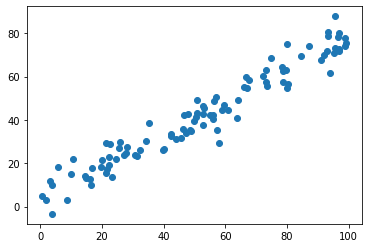

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=1)

In [8]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
pca.components_

array([[-0.79802368, -0.6026261 ]])

In [10]:
X_reduction = pca.transform(X)

In [11]:
X_restore = pca.inverse_transform(X_reduction)

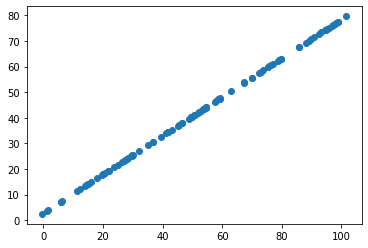

In [12]:
plt.scatter(X_restore[:,0],X_restore[:,1])
plt.show()

### 手写识别的例子

In [13]:
from sklearn import datasets

In [14]:
digits= datasets.load_digits()

In [15]:
X = digits.data

In [16]:
y = digits.target

In [17]:
noisy_digits = X + np.random.normal(0,4,size=X.shape)

In [25]:
example_digits = noisy_digits[y==0,:][:10]
print(example_digits.shape)
for i in range(1,10):
    X_num = noisy_digits[y==i,:][:10]
    example_digits = np.vstack([example_digits,X_num])

(10, 64)


In [26]:
example_digits.shape

(100, 64)

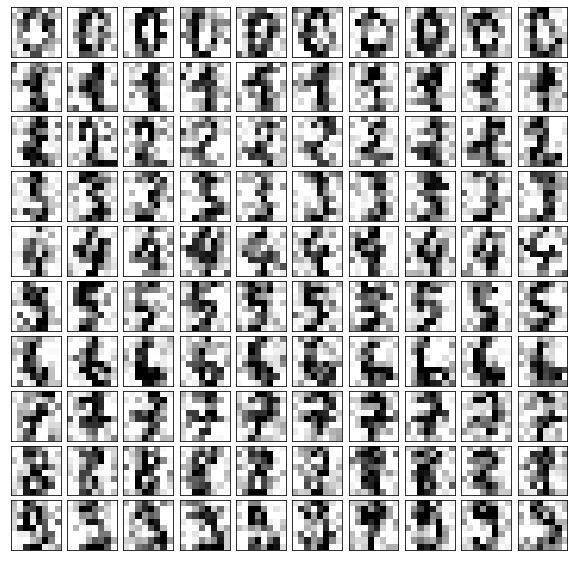

In [27]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

    plt.show()
    
plot_digits(example_digits)

In [28]:
pca = PCA(0.5)

In [30]:
pca.fit(noisy_digits)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [31]:
components = pca.transform(example_digits)

In [32]:
filtered_digits = pca.inverse_transform(components)

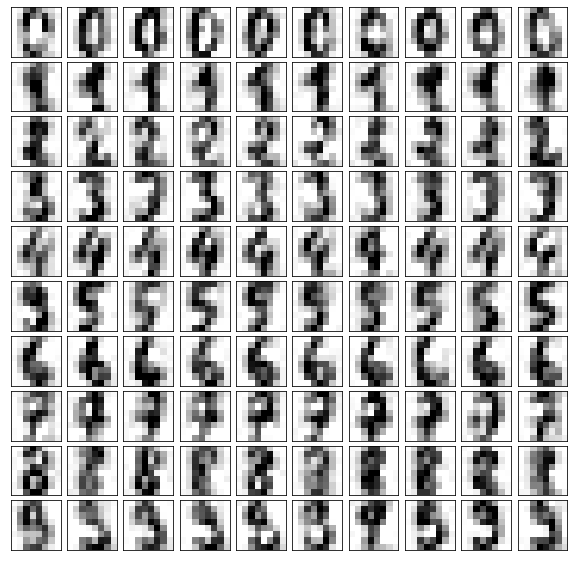

In [33]:
plot_digits(filtered_digits)